#### Aslam Fathin Rahmat

In [2]:
# Import Library

import pandas as pd                                   # Pandas for data manipulation
import numpy as np                                    # Numpy for array and basic math operation
import matplotlib.pyplot as plt                       # Matplotlib for plotting and detecting dates
import matplotlib.dates as mdates                     
import seaborn as sns                                 # Seaborn for plotting
from statsforecast import StatsForecast               # Statsforecast for auto ARIMA
from statsforecast.models import AutoARIMA
import pmdarima as pm                                 # Pmdarima for Auto ARIMA
import pmdarima.model_selection as pmms
from sklearn.metrics import mean_squared_error        # Sklearn for MSE and MAE calculation
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA         # Statsmodel for auto corellation and ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
# Import data

df = pd.read_csv("Case Study - Transaction.csv",sep=";")
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
# Show data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [5]:
# Group by Date and aggregate sum Qty

df_date_sum = df.groupby('Date').agg({"Qty":"sum"}).reset_index()
df_date_sum.head()

,Date,Qty
0,01/01/2022,49
1,01/02/2022,50
2,01/03/2022,76
3,01/04/2022,98
4,01/05/2022,67


In [6]:
df_date_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Qty     365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


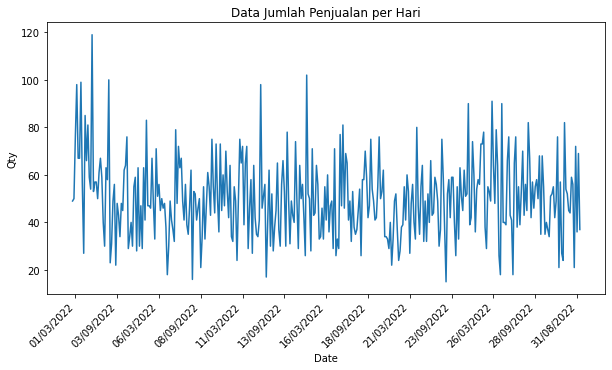

In [7]:
# Data Visualitation

plt.figure(figsize=(10,5))
plot = sns.lineplot(data=df_date_sum, x ="Date", y = "Qty")
plt.xticks(rotation=45, horizontalalignment="right")
locator = mdates.DayLocator(interval=30)
plot.xaxis.set_major_locator(locator)
plt.title("Data Jumlah Penjualan per Hari")
plt.show()

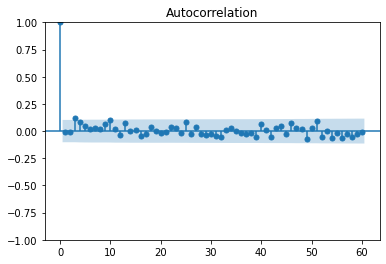

In [8]:
# Plot auto correlation
# Auto correlation is done to see data pattern

plot_acf(df_date_sum["Qty"], lags=60)
plt.show()

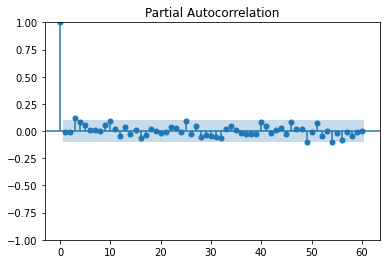

In [9]:
# Plot partial auto correlation

plot_pacf(df_date_sum["Qty"], lags=60)
plt.show()

In [10]:
# Auto ARIMA statsforecast

df_sf = pd.read_excel("date_sum.xlsx")
df_sf.head()

,unique_id,ds,y
0,qty,01/01/2022,49
1,qty,01/02/2022,50
2,qty,01/03/2022,76
3,qty,01/04/2022,98
4,qty,01/05/2022,67


In [11]:
# Plot the data read by Statsforecast

StatsForecast.plot(df_sf, engine='plotly')

# Statsforecast can't read the data coreectly, even the data that manualy edited using Excel
# Use Pmdarima library as alternative

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:691: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(arr)
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:756: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [12]:
# Auto ARIMA pmdarima
# If RAM udage is to high, restart Python kernel

# Split data into train and test data with 75% to 25% comparison
l = 0.75
y = df_date_sum["Qty"].to_numpy()
yl = int(len(y)*l)
train = y[:yl]
test = y[yl:]


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=2373.226, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=2242.176, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=1.48 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=2306.203, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=2220.319, Time=1.50 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=5.11 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=2.08 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=2294.519, Time=0.97 sec
 ARIMA(2,1,0)(2,1,0)[30]             : AIC=2181.947, Time=1.79 sec
 ARIMA(2,1,0)(1,1,0)[30]             : AIC=2207.759, Time=0.55 sec
 ARIMA(2,1,0)(2,1,1)[30]             : AIC=inf, Time=7.97 sec
 ARIMA(2,1,0)(1,1,1)[30]             : AIC=inf, Time=2.15 sec
 ARIMA(2,1,1)(2,1,0)[30]             : AIC=2136.275, Time=6.63 sec
 ARIMA(2,1,1)(1,1,0)[30]             : AIC=2161.301, Time=2.00 sec
 ARIMA(2,1,1)(2,1,1)[30]             : AIC=i

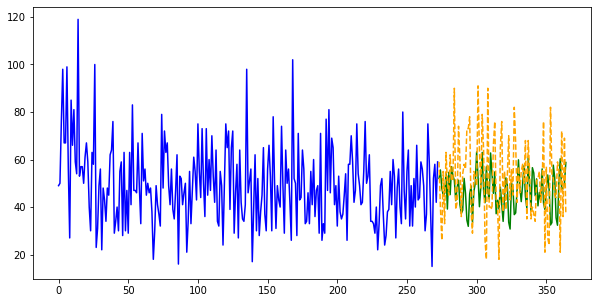

In [13]:
# Auto ARIMA with Pmdarima

# Auto ARIMA
model = pm.auto_arima(train, 
                      start_p=0, 
                      start_q=0,
                      max_p=2, 
                      max_q=2,
                      start_P=0,
                      start_Q=0, 
                      max_P=2,
                      max_Q=2, 
                      m=30, 
                      d=1, 
                      D=1,
                      seasonal=True,
                      trace=True,
                      suppress_warnings=True, 
                      stepwise=True)
forecast = model.predict(test.shape[0])

# Plot the result
x = np.arange(y.shape[0])
plt.figure(figsize=(10,5))
plt.plot(x[:yl], train, c='blue')
plt.plot(x[yl:], forecast, c='green')
plt.plot(x[yl:], test, c='orange', linestyle="--")
plt.show()

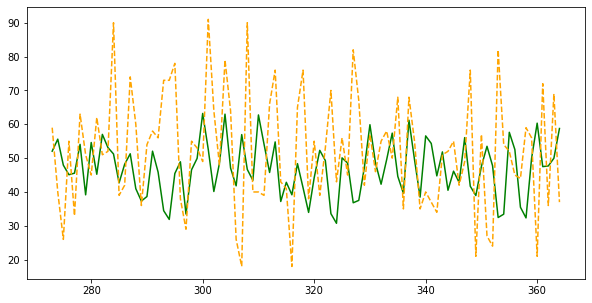

In [14]:
# Plot test and forcast data

plt.figure(figsize=(10,5))
plt.plot(x[yl:], forecast, c='green')
plt.plot(x[yl:], test, c='orange', linestyle="--")
plt.show()

In [15]:
# Validate the result using MSE dan MAE

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print("MSE"," = ", mse)
print("MAE"," = ", mae)

MSE  =  384.7832019549603
MAE  =  15.527526283537226


In [16]:
# Validate the result with ARIMA

df_arima = df_date_sum.copy()
l = 0.75
l_df = int(len(df_arima["Qty"])*l)
lg_df = len(df_arima["Qty"])

<AxesSubplot: >

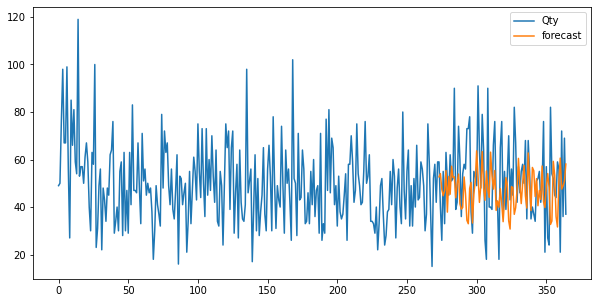

In [17]:
# ARIMA with Statsmodel

# ARIMA model
model = ARIMA(df_arima["Qty"],order=(0,1,1),seasonal_order=(2,1,0,30))
model_fit = model.fit()

# Plot the result
df_arima["forecast"] = model_fit.predict(start=l_df, end=lg_df, dynamic=True)
df_arima[["Qty", "forecast"]].plot(figsize=(10,5))

In [18]:
# Validate the result using MSE dan MAE

arima_test = np.array(df_arima["Qty"][l_df:])
arima_forecast = np.array(df_arima["forecast"][l_df:])
mse = mean_squared_error(arima_test, arima_forecast)
mae = mean_absolute_error(arima_test, arima_forecast)
print("MSE"," = ", mse)
print("MAE"," = ", mae)

MSE  =  375.104242222994
MAE  =  15.4129535524451
